In [ ]:
import csv

In [ ]:
pathway = ['news_all.csv','forum_all.csv','bbs_clean.csv']

def openCSV(fileName):
    contents = []
    with open(fileName, newline='') as csvfile:

#         讀取 CSV 檔案內容
        content = csv.reader(csvfile)
        next(content)
#         以迴圈輸出每一列
        for row in content:
            contents.append(row)
#         print(len(contents))
        return contents

contents_total = []
for i in pathway:
    contents_total+=openCSV(i) 
    #若是用append會變成直接裝入第二層list，所以要用加的

In [ ]:
total = {}
time = {}

for row in contents_total:
    if '國巨' in row[-1]: 
        if row[0] not in total.keys(): 
            total[row[0]] = row[-1]
            time[row[0]] = row[-4]
        else:
            print(row[0])

In [ ]:
print(len(total))
total

In [ ]:
print(len(time))
time

In [ ]:
criteria_up = []

with open ('up_refine.csv',newline='') as csvfile: #讀看漲關鍵字集
    
    for data in csvfile.readlines():
        data = data.strip()
        criteria_up.append(data)

print(len(criteria_up))
criteria_up

In [ ]:
criteria_down = []

with open ('down_refine.csv',newline='') as csvfile: #讀看漲關鍵字集
    
    for data in csvfile.readlines():
        data = data.strip()
        criteria_down.append(data)

print(len(criteria_down))
criteria_down

In [ ]:
import re #（去掉各種詞）
r1 = u"[^\u4e00-\u9fa5]"#去除英文及符號

def clean(dicName):
    newDic = {}
    for key, value in list(dicName.items()):
        newDic[key]=(re.sub(r1, '', value))
    return newDic

# list不用()，不然是另一種型態，但對操作沒差

In [ ]:
clean_total = clean(total)
print(len(clean_total))
clean_total

In [ ]:
up_paper = {}
down_paper = {}
else_paper = {}

for key, value in list(clean_total.items()):
    up = 0
    down = 0
    for keyU in criteria_up:
        if keyU in value:
            up += 1
#             break
    for keyD in criteria_down:
        if keyD in value:
            down += 1
#             break
    if up > down*1.05:
        up_paper[key] = value
    elif down > up*1.05:
        down_paper[key] = value
    else:
        else_paper[key] = value
        
        
print(len(up_paper),len(down_paper),len(else_paper))

In [ ]:
up_paper

In [ ]:
vector = []

with open ('vector.csv',newline='') as csvfile: #讀看漲關鍵字集
    
    for data in csvfile.readlines():
        data = data.strip()
        vector.append(data)

print(len(vector))
vector

In [ ]:
def buildVec(dicName, vecName):
    result = {}
    
    for key, value in dicName.items(): #每一篇文章
        vec = [0]*len(vecName)
        for index, item in enumerate(vecName): #n是關鍵字
            vec[index] = dicName[key].count(item)      
        result[key] = vec
        
    return result

In [64]:
up_vec = buildVec(up_paper, vector)

In [ ]:
up_vec

In [ ]:
print(len(up_vec))

In [ ]:
for key, value in list(up_vec.items()):
    max = 5
    for i in value:
        if i > max:
            max = i
    if max > 5:
        print(key, max)

In [ ]:
down_vec = buildVec(down_paper, vector)
print(len(down_vec))

In [ ]:
print(len(down_vec))

In [ ]:
for key, value in list(down_vec.items()):
    max = 5
    for i in value:
        if i > max:
            max = i
    if max > 5:
        print(key, max)

In [ ]:
count = 0
max_sum = 0
for key, value in list(up_vec.items()):
    if sum(value) > max_sum:
        max_sum = sum(value)
        count += 1
    
print(max_sum)

In [ ]:
count = 0
max_sum_d = 0
for key, value in list(down_vec.items()):
    if sum(value) > max_sum_d:
        max_sum_d = sum(value)
        count += 1
    
print(max_sum_d)

In [ ]:
total_vec = {**down_vec, **up_vec} 
print(len(total_vec))

In [ ]:
total_vec

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rf

In [ ]:
from sklearn.model_selection import train_test_split as sp

In [65]:
x_up = []
for value in up_vec.values():
    x_up.append(value)

In [66]:
y_up = [0]*len(up_vec)   

In [96]:
x_up_train, x_up_test, y_up_train, y_up_test = sp(x_up, y_up, test_size = 0.3)                                                                                                               

In [97]:
x_down = []
for value in down_vec.values():
    x_down.append(value)
    
y_down = [1]*len(down_vec)   

In [98]:
x_down_train, x_down_test, y_down_train, y_down_test = sp(x_down, y_down, test_size = 0.3)   

In [99]:
x_train = x_up_train + x_down_train
print(len(x_train))

1870


In [100]:
x_test = x_up_test + x_down_test
print(len(x_test))

802


In [101]:
y_train = y_up_train + y_down_train
print(len(y_train))
y_test = y_up_test + y_down_test
print(len(y_test))

1870
802


In [147]:
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [225]:
clf = rf(random_state=0, max_depth = 10)
# max_depth = 2,

In [226]:
clf.fit(x_train, y_train)
# 建模型

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_predict = clf.predict(x_test)
y_predict

In [228]:
clf.score(x_test, y_test)

0.8653366583541147

In [129]:
from sklearn import svm

In [131]:
va = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
#不小心跑完svm

In [132]:
va.score(x_test, y_test)

0.9962593516209476

In [133]:
from sklearn.model_selection import cross_val_score
# KF 就是 cross_val，cross_val_score又加上算完準確性（對角線的sum/全部的sum）

In [140]:
scores = cross_val_score(va, x_test, y_test, cv=5)

In [219]:
scores.mean()

0.9812888198757763

In [154]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Confusion matrix, without normalization
[[397   2]
 [  1 402]]
Normalized confusion matrix
[[0.99498747 0.00501253]
 [0.00248139 0.99751861]]


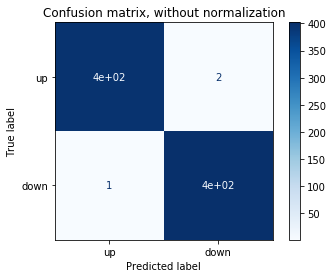

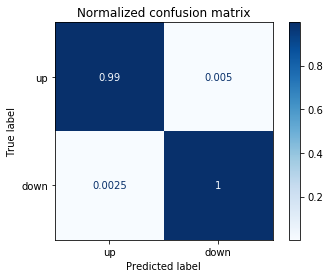

In [157]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(va, x_test, y_test,
                                 display_labels=['up','down'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [150]:
scores_clf = cross_val_score(clf, x_test, y_test, cv=5)

In [152]:
print(scores_clf.mean())
scores_clf

0.9264363354037266


array([0.88198758, 0.9689441 , 0.95      , 0.91875   , 0.9125    ])

Confusion matrix, without normalization
[[303  96]
 [ 12 391]]
Normalized confusion matrix
[[0.7593985  0.2406015 ]
 [0.02977667 0.97022333]]


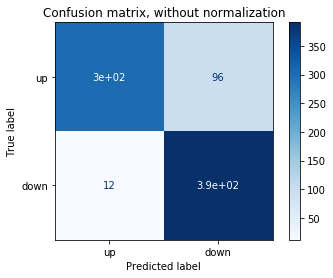

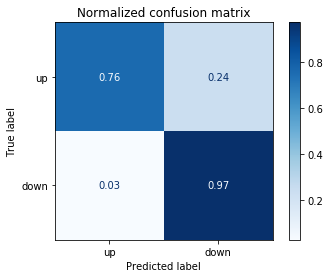

In [229]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['up','down'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [206]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.naive_bayes import BernoulliNB as nb
from sklearn.neighbors import KNeighborsClassifier as knn

In [175]:
dt_clf = dt(random_state=0, max_depth = 10)

In [190]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [191]:
dt_clf.score(x_test, y_test)

0.7630922693266833

In [192]:
scores_dt = cross_val_score(dt_clf, x_test, y_test, cv=5)

In [193]:
print(scores_dt.mean())
scores_dt

0.7568711180124224


array([0.73913043, 0.76397516, 0.78125   , 0.7625    , 0.7375    ])

Confusion matrix, without normalization
[[220 179]
 [ 11 392]]
Normalized confusion matrix
[[0.55137845 0.44862155]
 [0.02729529 0.97270471]]


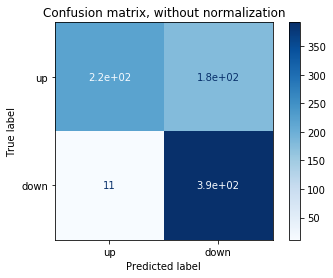

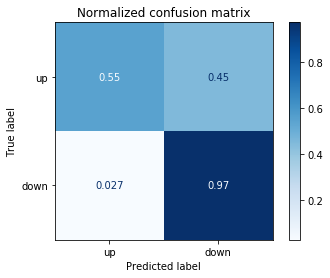

In [194]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt_clf, x_test, y_test,
                                 display_labels=['up','down'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [207]:
nb_clf = nb()
nb_clf.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [208]:
nb_clf.score(x_test, y_test)

0.9688279301745636

In [209]:
scores_nb= cross_val_score(nb_clf, x_test, y_test, cv=5)
print(scores_nb.mean())
scores_nb

0.945163043478261


array([0.89440994, 0.97515528, 0.95625   , 0.975     , 0.925     ])

Confusion matrix, without normalization
[[395   4]
 [ 21 382]]
Normalized confusion matrix
[[0.98997494 0.01002506]
 [0.05210918 0.94789082]]


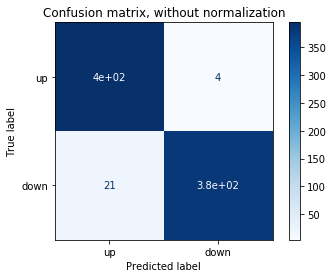

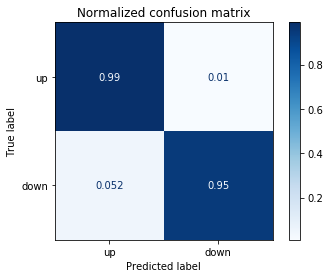

In [210]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb_clf, x_test, y_test,
                                 display_labels=['up','down'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [203]:
knn_clf = knn()
knn_clf.fit(x_train, y_train)
knn_clf.score(x_test, y_test)

0.8965087281795511

In [204]:
scores_knn= cross_val_score(knn_clf, x_test, y_test, cv=5)
print(scores_knn.mean())
scores_knn

0.8716226708074533


array([0.8136646 , 0.88819876, 0.9       , 0.8625    , 0.89375   ])

Confusion matrix, without normalization
[[375  24]
 [ 59 344]]
Normalized confusion matrix
[[0.93984962 0.06015038]
 [0.14640199 0.85359801]]


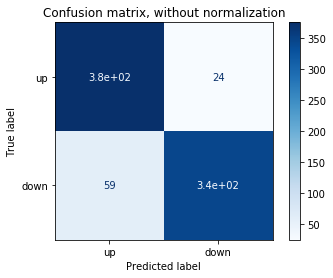

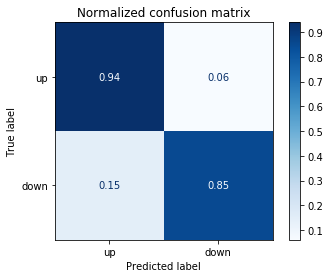

In [205]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_clf, x_test, y_test,
                                 display_labels=['up','down'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [211]:
import time
import datetime

In [220]:
from sklearn.naive_bayes import MultinomialNB as Mnb

In [221]:
Mnb_clf = Mnb()
Mnb_clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [222]:
Mnb_clf.score(x_test, y_test)

0.9513715710723192

In [223]:
scores_Mnb= cross_val_score(Mnb_clf, x_test, y_test, cv=5)
print(scores_Mnb.mean())
scores_Mnb

0.9314751552795031


array([0.86335404, 0.95652174, 0.94375   , 0.9625    , 0.93125   ])

Confusion matrix, without normalization
[[386  13]
 [ 26 377]]
Normalized confusion matrix
[[0.96741855 0.03258145]
 [0.06451613 0.93548387]]


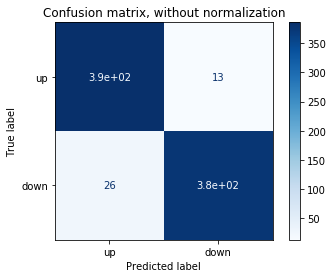

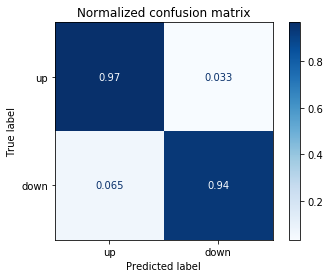

In [224]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(Mnb_clf, x_test, y_test,
                                 display_labels=['up','down'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
import pandas as pd

In [ ]:
result_up = pd.DataFrame([(y, time[y], clean_total[y],'up', up_vec[y]) for y in list(up_paper.keys())])
result_up

In [ ]:
result_down = pd.DataFrame([(y, time[y], clean_total[y],'down', down_vec[y]) for y in list(down_paper.keys())])
result_down

In [ ]:
result = result_up.append(result_down)
print(len(result))
result

In [ ]:
with pd.ExcelWriter('Stock01_paper.xlsx') as writer:
    result.to_excel(writer, index = False , header = ['id', 'time', 'content', 'class', 'vec'])